# Principal Component Analysis

- Useful guides  
https://www.reneshbedre.com/blog/principal-component-analysis.html  
https://ostwalprasad.github.io/machine-learning/PCA-using-python.html  
https://towardsdatascience.com/eigenvalues-and-eigenvectors-378e851bf372#:~:text=Principal%20component%20analysis%20(PCA),we%20want%20to%20keep%20beforehand
https://setosa.io/ev/principal-component-analysis/

## Why do we need PCA?
- Any data would contain useful information as well as noise and redundant information (correlated)
- We want to extract the maximum possible information from the data while reducing the noise and redundant information

## What is PCA?
- PCA is dimension reduction technique which takes set of possibly correlated variables and tranforms into linearly uncorrelated principal components. It is used to emphasize variations and bring out strong patterns in a dataset.
-  It is a method of extracting important variables from a large set of variables available in a data set. 
- It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
- It uses the power of eigenvectors and eigenvalues to reduce the number of features in the data through linear transformation, while keeping most of the variance (information).
- It combines multiple numeric predictor variables into a smaller set of uncorrelated variables, called principal components, by transforming them into a weighted linear combination of the original predictor set
- These linear combinations of the predictors are known as principal components, which seeks to capture most possible variance.
- PC1 is defined as the linear combination of the predictors that captures the most variability of all possible linear combinations.
- Subsequent PCs are capture the remaining variability while also being uncorrelated with all previous PCs
- PCA works better in revealing linear patterns in high-dimensional data
- In short, PCA transforms the correlated features into linearly independent components so that all the important information are captured. This results in a reduction in dimensionality. Principal components are the axes in which our data shows the most variation. The first principal component explains the biggest part of the observed variation and the second principal component the second largest part and so on. The Principal components are the eigenvectors of the covariance matrix. The first principal component corresponds to the eigenvector with the largest eigenvalue.


![equation](images/equation.png)
- We want to find a matrix W to transform X into a p-dimensional dataset. A good transformation matrix W is actually the eigenvector of X

## When do we use PCA?
- When we want to reduce the dimensionality of data but cannot identify which are the unimportant ones that can be ignored
- When we want to ensure that the features of the data are independent of one another
- When we want to do feature selection. We can select variables according to the magnitude of the loadings (PCA coefficients). Each variable contributes with varying degree to each component. We find the first principal component one (PC1). Now PC1 is a linear combination of the variables (features). The variable with the highest weight (coefficient)(loading scores) in the linear equation is the most important feature.

## Problems with PCA?
- Only linear relationships are considered. For nonlinear datasets, t-SNE can be used for dimensionality reduction
- Loss of information
- Assumes linear correlations among features
- Assumes that large variance equals high importance, which does not always have to be the case
- Does not take class labels into account, in the case of classification tasks

## How do we compute the principal components?
1. Standardizing data by subtracting the mean and dividing by the standard deviation
2. Calculate the Covariance matrix.
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Merge the eigenvectors into a matrix and apply it to the data. This rotates and scales the data. The principal components are now aligned with the axes of our features.
5. Keep the new features which account for the most variation and discard the rest.

## How can we evaluate the performance of dimensionality reduction algorithm?
- Intuitively, a dimensionality reduction algorithm performs well if it elimiNates a lot of dimensions from the dataset without losing too much information
- One way to measure this is to apply the reverse transformation and measure the reconstruction error
- Alternatively, if using dimensionality reduction as a preprocessing step, we can measure the performance of the second algorithm.

## Example

In [1]:
import pandas as pd
import numpy as np

import sys
import zipfile
import wget
import yaml
import os
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster

In [2]:
with open("config.yml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
def read_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip"
    data_path = config['data']['path']

    if os.path.exists(Path(data_path, "Facebook_metrics.zip")):
        pass
    else:
        wget.download(url, data_path)
        with zipfile.ZipFile("./data/Facebook_metrics.zip", 'r') as zip_ref:
            zip_ref.extractall(data_path)


    df = pd.read_csv(Path(data_path, 'dataset_Facebook.csv'), sep=";")

    df = df.rename(columns={'Page total likes': 'Total_Page_Likes',
                            'Post Month': 'Month_Posted',
                            'Post Weekday': 'Weekday_Posted',
                            'Post Hour': 'Hour_Posted',
                            'Lifetime Post Total Reach': 'Total_Reach',
                            'Lifetime Post Total Impressions': 'Total_Impressions',
                            'Lifetime Engaged Users': 'Total_Users_Engaged',
                            'Lifetime Post Consumers': 'Total_Consumers',
                            'Lifetime Post Consumptions': 'Total_Consumptions',
                            'Lifetime Post Impressions by people who have liked your Page': 'Total_Impressions_Liked_Pages',
                            'Lifetime Post reach by people who like your Page': 'Total_Reach_Liked_Pages',
                            'Lifetime People who have liked your Page and engaged with your post': 'Total_Engaged_Liked_Pages',
                            'comment': 'Comment',
                            'like': 'Like',
                            'share': 'Share',
                            'Total Interactions': 'Total_Interactions'})
    return df

In [4]:
def check_missing_values(df):
    df_missing = (df
                  .isnull()
                  .sum()
                  .reset_index()
                  .rename(columns={'index': 'Variable',
                                   0: 'Number_of_missing'})
                    )
    fig, ax = plt.subplots(figsize=(7,5))                
    sns.barplot(y=df_missing.Variable, x=df_missing.Number_of_missing, ax=ax)
    ax.set_xlabel("Count of missing values")
    ax.set_ylabel("")
    plt.show()

In [5]:
df = read_data()

Since there are only a few missing values, we shall remove them.

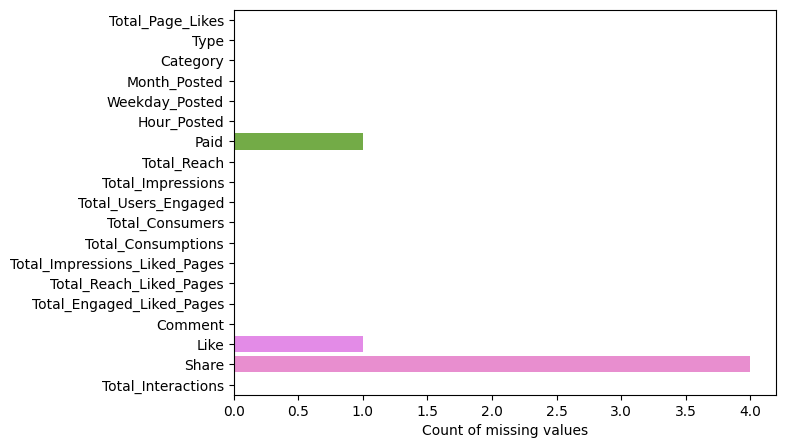

In [6]:
check_missing_values(df)

In [7]:
df = df.dropna(axis=0, how='any')

In this example, we will only use numerical features (exclude all nominal features)
- Total_Page_Likes
- Paid
- Total_Reach
- Total_Impressions
- Total_Users_Engaged
- Total_Consumers
- Total_Consumptions
- Total_Impressions_Liked_Pages
- Total_Reach_Liked_Pages
- Total_Engaged_Liked_Pages
- Comment
- Like
- Share
- Total Total_Interactions

In [8]:
df_subset = df.loc[:, config['data']['cols']]

- From the correlation, we see that there are some features that are highly correlated with other features. PCA would be useful in this case

<AxesSubplot: >

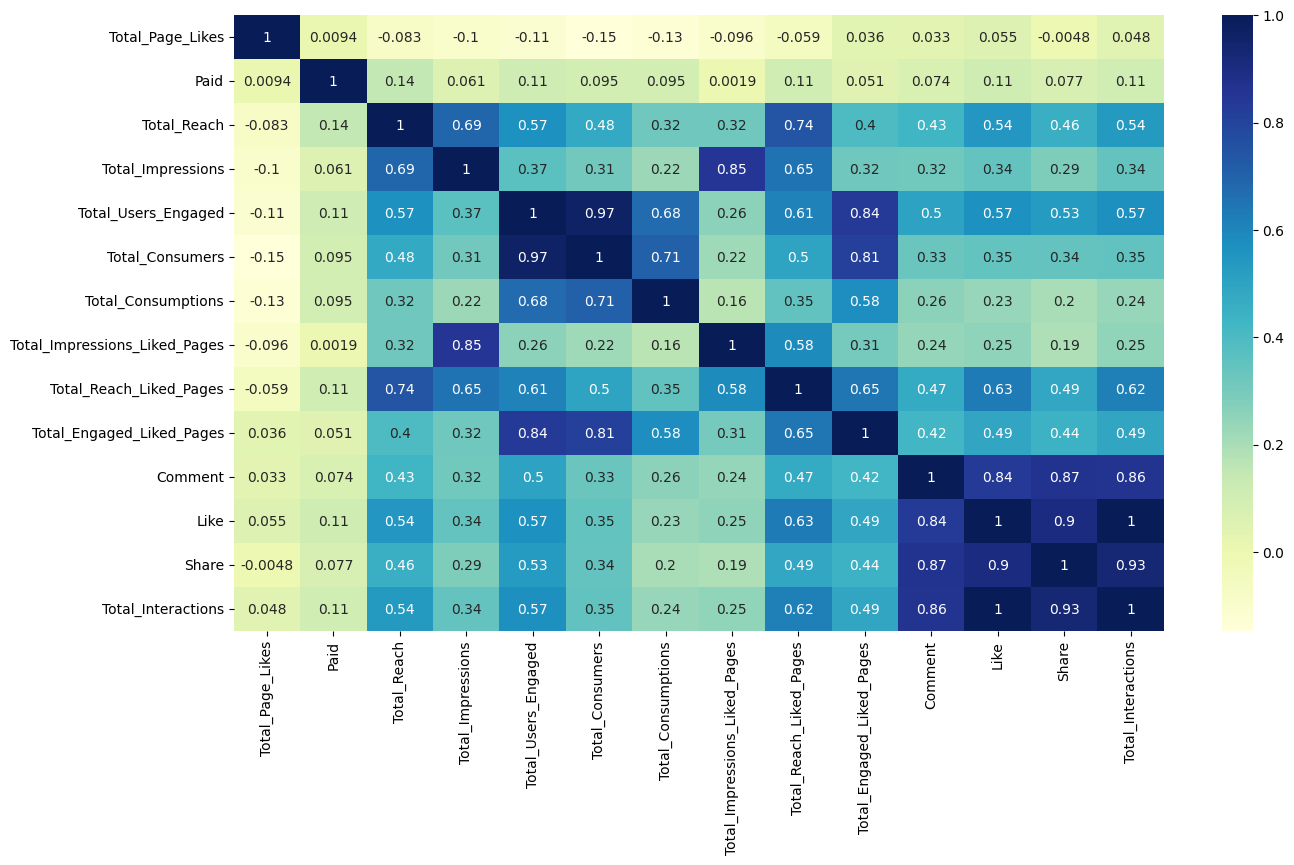

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df_subset.corr(), cmap="YlGnBu", annot=True)

## PCA From Scratch

### 1. Standardise the variables

- PCA will be drawn to summarising predictors that have more variation.
- If original predictors are of different measurement scales, then the first few components will focus on summarising the higher magnitude predictors.
- As a result, the weights of principal components will be larger for the higher variability predictors on the first few components.

We will first center and scale the data. To center a predictor variable, the average predictor value is subtracted from all values. To scale the data, each value of the predictor is divided by its standard deviation. After centering and scaling, the predictor variables will be zero mean and a common standard deviation of one.

In [10]:
def normalize(X):
    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    return X

In [11]:
X_std = normalize(df_subset)

### 2. Compute Covariance Matrix

Covariance matrix is a square matrix giving the covariance between each pair of elements of a given random vector. It's main diagonal computes the covariance of each element with itself (Variance)

![covariance](images/covariance.png)
![covariance_2](images/covariance_2.png)

In [12]:
cov_mat = np.cov(X_std, rowvar=False) # must be ordered like a dataframe, where each column represents a feature.

### 3. Compute the Eigenvalues and Eigenvectors

- When we take the dot product of a matrix and a vector, the resulting vector is a rotated and scaled version of the original one. 
- This transformation is a linear one. When we have a bunch of data points on a grid and we apply the matrix to these data points and move the grid along the data points, the lines of the grid remain straight. If the lines were curved, then this transformation would be non-linear.

![pca-linear](images/pca_linear.png)

- When we multiply a matrix with a vector, the vector get’s transformed linearly. This linear transformation is a mixture of rotating and scaling the vector. The vectors, which get only scaled and not rotated are called eigenvectors. The factor by which they get scaled is the corresponding eigenvalue.

![eigen_1](images/eigen_1.png)
![eigen_2](images/eigen_2.png)
- A 2x2 matrix will always have two eigenvectors, but they are not always orthogonal to each other

- Each eigenvector has a corresponding eigenvalues. It is the factor by which the eigenvector gets scaled when it is transformed by the matrix.

![eigenvalue](images/eigenvalue.png)
- Using eigenvalues and eigenvectors, we can find the main axes of our data.
- First main axis (PC1) is the axis in which the data varies the most.
- Second main axis (PC2) is the axis with the second largest variation.
- The eigenvectors shows us the direction of our main axis. The greater the eigenvalues, the greater the variation along the axis.

![pca](images/pca.png) 
- This means that the largest eigenvalue corresponds to the axis with the most variance

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

- The matrices represent the linear transformation
- When we multiple covariance matrix with our data, we see that the center of the data does not change and the data gets stretched in the direction of the eigenvector.
- Data points lying directly on the eigenvectors do not get rotated

![rotate_1](images/rotate_1.png)
![rotate_2](images/rotate_2.png)

In [14]:
eigenvalues

array([ 6.60463061e+00,  2.00079794e+00,  1.68659319e+00,  9.82664460e-01,
        1.00723682e+00,  6.08895891e-01,  4.51783389e-01,  3.13918041e-01,
        1.61046434e-01,  1.17596722e-01,  7.89620308e-02,  1.36690442e-02,
        5.45504374e-04, -6.44413769e-17])

### 4. Find the number of PCs to use

- To decide on the number of PCs to use, we can look at the proportion of total variability in the original variables

- The proportion of total variability in the original variables is given by $\displaystyle \frac{\lambda_{j}}{\sum_{t}\lambda_{t}}$, where $\lambda_{j}$ is the jth eigenvalue

In [15]:
# sort the eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalue = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[sorted_index]

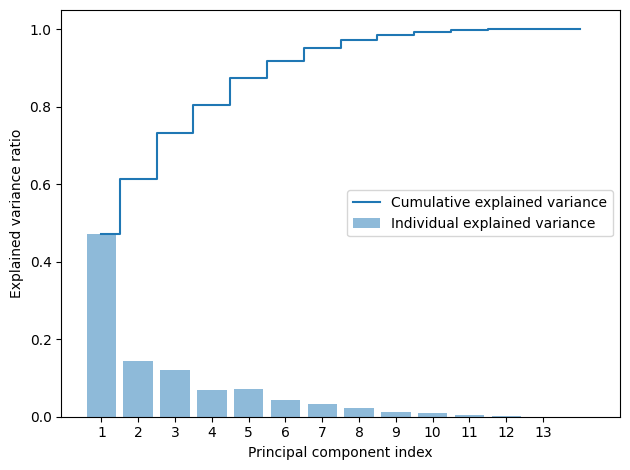

In [16]:
# explained variance per principal component
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i]/np.sum(eigenvalues))

cum_sum_exp = np.cumsum(explained_variances)
plt.bar(range(1, len(explained_variances)+1), explained_variances, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_sum_exp)+1), cum_sum_exp, where='mid', label='Cumulative explained variance')
plt.xticks(range(1, len(explained_variances)))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
cum_sum_exp

array([0.47080628, 0.6134317 , 0.73365927, 0.80370779, 0.87550793,
       0.91891263, 0.95111768, 0.9734951 , 0.98497518, 0.99335798,
       0.99898673, 0.99996111, 1.        , 1.        ])

- The first two PCs accounts for 61% of the total variation in the original dataset.

### 5. Multiply the eigenvector with the original data

In [18]:
num_pc = 2
top_idx = np.argsort(eigenvalues)[::-1][:num_pc]
W = eigenvectors[:, top_idx]
pca = pd.DataFrame(np.dot(df_subset, W))
pca = pca.rename(columns={0: "PC1",
                          1: "PC2"})

In [19]:
pca

,PC1,PC2
0,1.699007,0.910215
1,-0.329924,-0.445498
2,1.813039,0.785390
3,-6.977296,3.897143
4,0.161822,1.499619
...,...,...
490,0.474352,-0.089619
491,0.892695,-0.402828
492,1.252359,-0.341032
493,1.037559,-0.328738


In [20]:
pca['target'] = df.Type

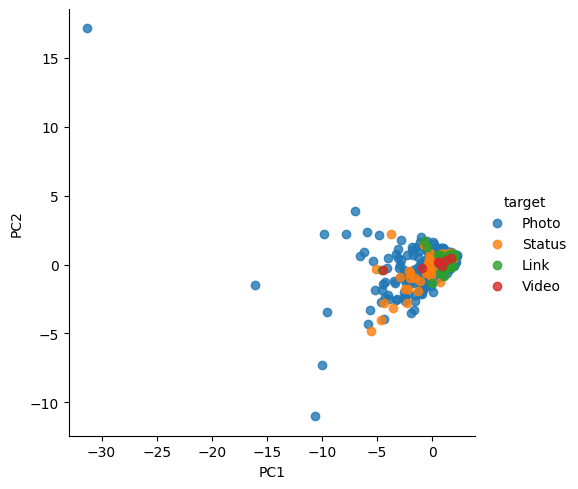

In [21]:
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca, 
    hue='target',
    fit_reg=False, 
    legend=True
    )

## PCA using scikit-learn

In [22]:
pca_sklearn = PCA(n_components=5)
pca_sklearn_transform = pca_sklearn.fit_transform(X_std)
pca_sklearn_df = pd.DataFrame(
    data=pca_sklearn_transform,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)
pca_sklearn_df['target'] = df.Type

In [23]:
pca_sklearn.explained_variance_ratio_

array([0.47080628, 0.14262542, 0.12022757, 0.07180014, 0.07004852])

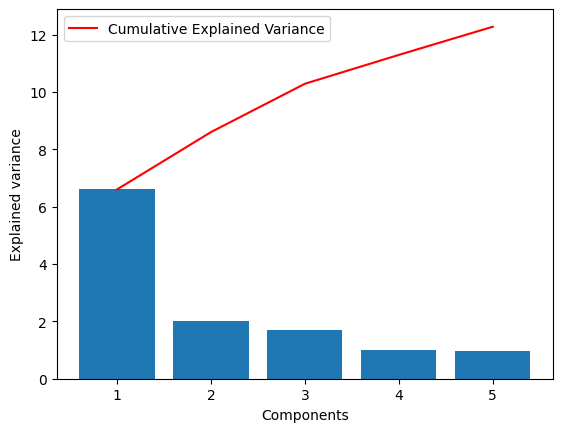

In [24]:
plt.bar(range(1,len(pca_sklearn.explained_variance_ )+1),pca_sklearn.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_sklearn.explained_variance_ )+1),
         np.cumsum(pca_sklearn.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

## PCA Biplot

Biplots are graphs that show
- the scaled PCA scatterplots
- the loading (weight) plots. Loadings are the correlation coefficients between the original features and the principal components. They represent elements of the eigenvector.
- vectors that show how strongly each feature influences the principal component

The following a few different ways to plot biplot

### Method 1

In [25]:
def biplot(pca, X_std):

    xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
    yvector = pca.components_[1]
    
    xs = pca.transform(X_std)[:,0] # see 'prcomp(my_data)$x' in R
    ys = pca.transform(X_std)[:,1]

    for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                color='r', width=0.0005, head_width=0.0025)
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                list(X_std.columns.values)[i], color='r')

    for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
        plt.plot(xs[i], ys[i], 'bo')
        plt.text(xs[i]*1.2, ys[i]*1.2, list(X_std.index)[i], color='b')

    plt.show()

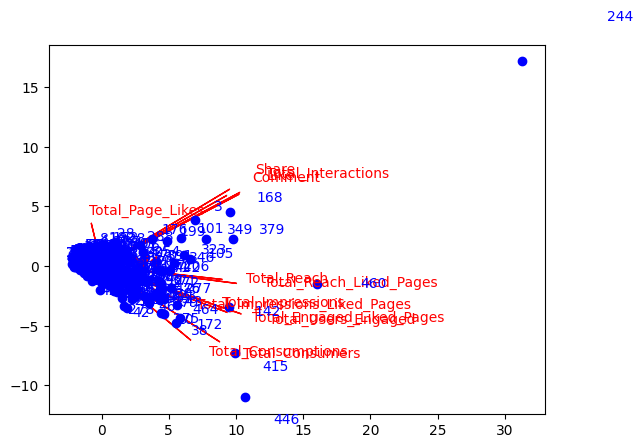

In [26]:
biplot(pca_sklearn, X_std)

### Method 2

In [27]:
pca_df_scaled = pca_sklearn_df.copy()
 
scaler_df = pca_sklearn_df.loc[:, ['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]


In [28]:
def biplot_alt(pca, pca_df_scaled, X_std):
    loadings = pca.components_
    n_features = pca.n_features_in_
    feature_names = X_std.columns

    # PC names
    pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
    # Match PC names to loadings
    pc_loadings = dict(zip(pc_list, loadings))
    # Matrix of corr coefs between feature names and PCs
    loadings_df = pd.DataFrame.from_dict(pc_loadings)
    loadings_df['feature_names'] = feature_names
    loadings_df = loadings_df.set_index('feature_names')
    loadings_df

    # combine scatterplot and loading plot into biplot
    xs = loadings[0]
    ys = loadings[1]
    
    sns.lmplot(
        x='PC1', 
        y='PC2', 
        data=pca_df_scaled, 
        fit_reg=False, 
        )
    
    for i, varnames in enumerate(feature_names):
        plt.scatter(xs[i], ys[i], s=200)
        plt.arrow(
            0, 0, # coordinates of arrow base
            xs[i], # length of the arrow along x
            ys[i], # length of the arrow along y
            color='r', 
            head_width=0.01
            )
        plt.text(xs[i], ys[i], varnames)
    
    xticks = np.linspace(-0.8, 0.8, num=5)
    yticks = np.linspace(-0.8, 0.8, num=5)
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    plt.title('2D Biplot')
    plt.show()


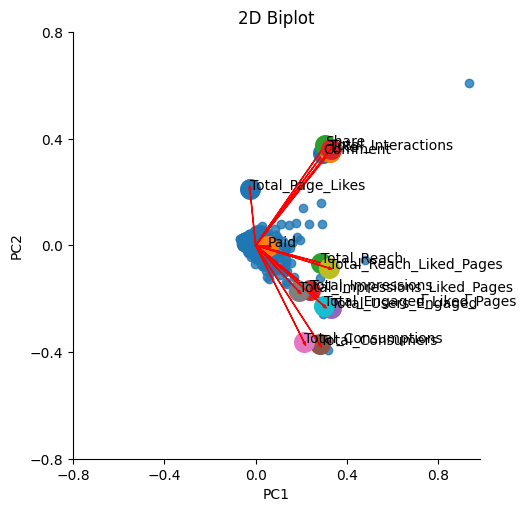

In [29]:
biplot_alt(pca_sklearn, pca_df_scaled, X_std)

### Method 3

In [37]:
loadings = pca_sklearn.components_
num_pc = pca_sklearn.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_subset.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
Total_Page_Likes,-0.024568,0.209468,-0.069217,-0.151809,-0.936197
Paid,0.054622,-0.004012,-0.039392,-0.962209,0.129358
Total_Reach,0.286905,-0.065708,0.213943,-0.152692,0.049496
Total_Impressions,0.238673,-0.165803,0.545693,-0.021030,-0.050481
Total_Users_Engaged,0.331780,-0.234092,-0.260141,0.023696,-0.011370
Total_Consumers,0.280714,-0.370560,-0.288457,0.029818,-0.018628
Total_Consumptions,0.211984,-0.362591,-0.283779,-0.002143,0.012497
Total_Impressions_Liked_Pages,0.188576,-0.172057,0.547665,0.088894,-0.107636
Total_Reach_Liked_Pages,0.320873,-0.084990,0.232101,-0.036328,-0.084770


In [34]:
num_pc

14

In [41]:
cluster.biplot(cscore=pca_sklearn_transform, loadings=loadings, labels=df_subset.columns.values, 
var1=round(pca_sklearn.explained_variance_ratio_[0]*100, 2),
var2=round(pca_sklearn.explained_variance_ratio_[1]*100, 2))

![biplot](biplot_2d.png)

- If the variables are highly associated, the angle between the variable vectors should be as small as possible in the biplot
- The length of PCs in the biplot refers to the amount of variance contributed by the PCs. The longer the longer the length of PC, the higher the variance contributed and well represented in space.